In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
x,y = make_regression(n_samples=10,n_features=2,noise=10)

In [3]:
x

array([[-0.30887299, -0.54086032],
       [-1.36514345, -1.10713607],
       [ 1.17800177, -2.11843097],
       [-0.46964413, -1.43510182],
       [ 0.12213633, -0.40111201],
       [-0.64133665,  0.05142191],
       [-1.11511634, -0.2462536 ],
       [-3.01611738,  1.45253188],
       [-0.75443279,  1.71487747],
       [-0.54363346,  0.75798254]])

In [4]:
y

array([ -75.61219564, -193.28446585,  -93.56654058, -156.53100645,
        -31.08855378,  -65.40747931, -106.74045562, -103.24502778,
         82.12810485,   40.85341385])

In [5]:
X = np.concatenate((x, np.ones((10, 1))), axis=1)

In [6]:
X

array([[-0.30887299, -0.54086032,  1.        ],
       [-1.36514345, -1.10713607,  1.        ],
       [ 1.17800177, -2.11843097,  1.        ],
       [-0.46964413, -1.43510182,  1.        ],
       [ 0.12213633, -0.40111201,  1.        ],
       [-0.64133665,  0.05142191,  1.        ],
       [-1.11511634, -0.2462536 ,  1.        ],
       [-3.01611738,  1.45253188,  1.        ],
       [-0.75443279,  1.71487747,  1.        ],
       [-0.54363346,  0.75798254,  1.        ]])

In [7]:
y = y.reshape(10,1)

In [8]:
theta = np.random.randn(3, 1)
print("Theta initial :\n", theta)

Theta initial :
 [[ 1.57533463]
 [ 1.33472435]
 [-0.75652104]]


In [9]:
def model(X,theta):
    return X.dot(theta)

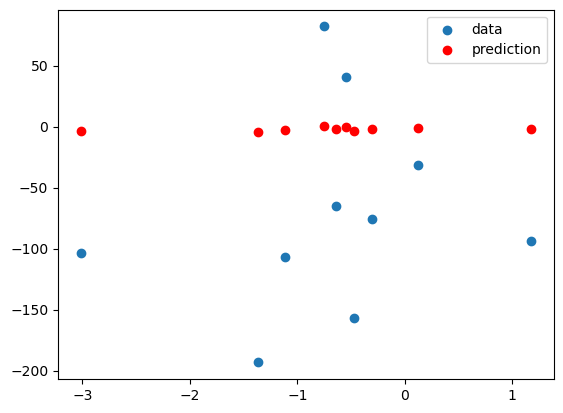

In [10]:
plt.scatter(X[:, 0], y, label="data")
plt.scatter(X[:, 0], model(X, theta), color='r', label="prediction")
plt.legend()
plt.show()

In [11]:
def function_cout(X,y,theta):
    m=len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [12]:
def grad(X,y,theta):
    m=len(y)
    return X.T.dot((model(X,theta) - y))/m 

In [13]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    hist_fct_cout = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate *grad(X,y,theta)
        hist_fct_cout[i] = function_cout(X,y,theta)
    return theta,hist_fct_cout

In [14]:
t,fct_hist = gradient_descent(X,y,theta,0.01,10000)

t

array([[73.64086729],
       [84.29153685],
       [-3.55289515]])

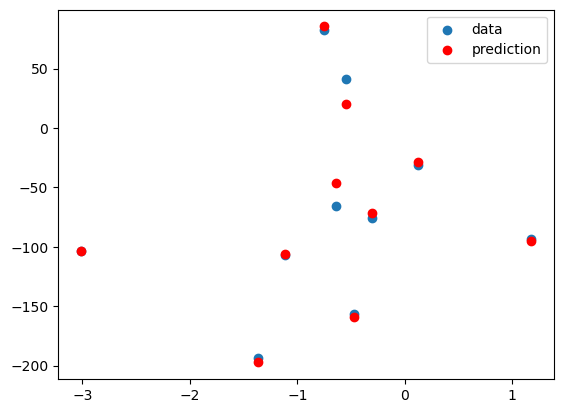

In [15]:
plt.scatter(X[:, 0], y, label="data")
plt.scatter(X[:, 0], model(X, t), color='r', label="prediction")
plt.legend()
plt.show()

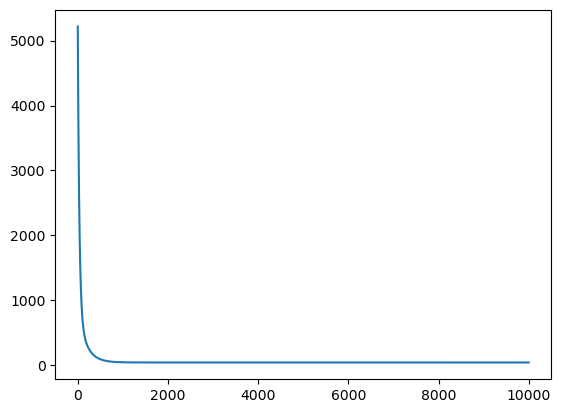

In [16]:
plt.plot(range(10000),fct_hist)